Opening raw data file record\first_recording\first_recording4.fif...
    Range : 0 ... 28887 =      0.000 ...   115.548 secs
Ready.
Reading 0 ... 28887  =      0.000 ...   115.548 secs...
Effective window size : 1.024 (s)


C:\Users\Sunsun\AppData\Local\Temp\ipykernel_21180\2928384901.py:6: RuntimeWarning: This filename (record\first_recording\first_recording4.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(fname, preload = True)
e:\Thesis\hybrid-ssvep-p300-speller\hybridspeller\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


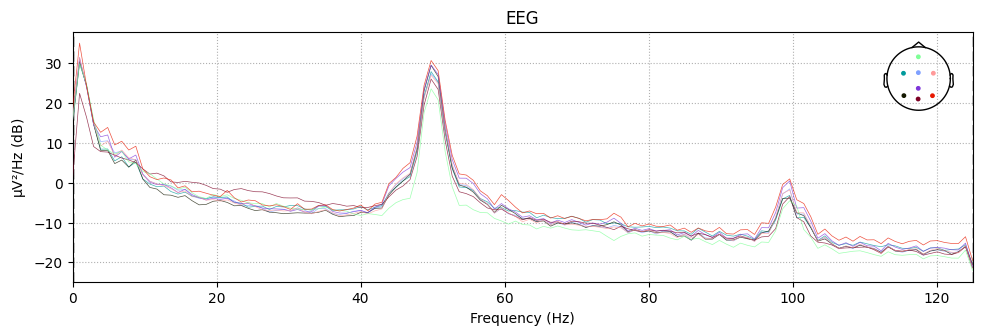

In [43]:
import mne
from scipy.signal import hilbert

fname = "record\\first_recording\\first_recording4.fif"
# fname = "record\sunsun\sunsun0.fif"
raw = mne.io.read_raw_fif(fname, preload = True)
raw.compute_psd().plot()


Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Effective window size : 1.024 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
e:\Thesis\hybrid-ssvep-p300-speller\hybridspeller\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


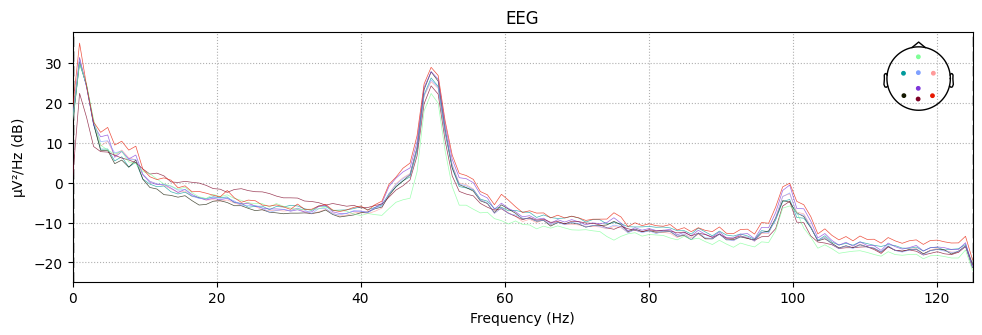

In [44]:
import numpy as np

notch_filtered_eeg = raw.copy().notch_filter(np.arange(50, 125, 50), filter_length='auto', phase='zero')
notch_filtered_eeg.compute_psd().plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 10 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 10.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)


e:\Thesis\hybrid-ssvep-p300-speller\hybridspeller\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


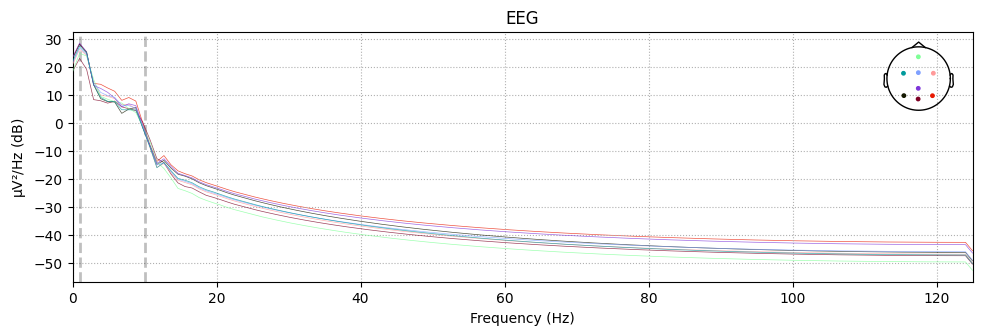

In [45]:
raw_p300 = raw.copy().filter(1, 10, method='iir')
raw_p300.compute_psd().plot()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 11 - 17 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 11.00, 17.00 Hz: -6.02, -6.02 dB

Effective window size : 1.024 (s)


e:\Thesis\hybrid-ssvep-p300-speller\hybridspeller\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


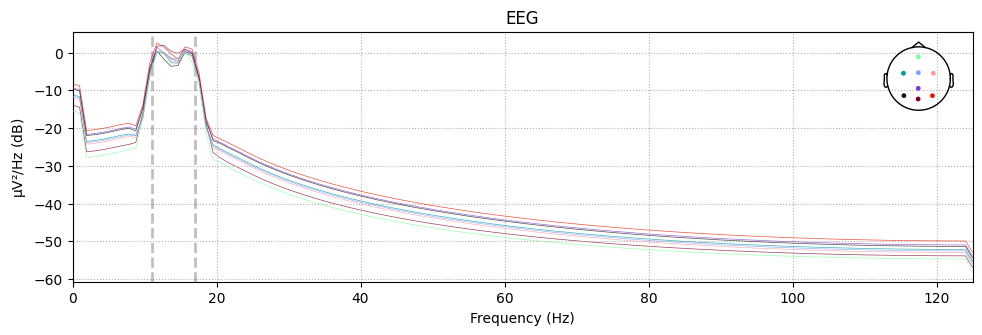

In [46]:
raw_ssvep = raw.copy().filter(11, 17, method='iir')
raw_ssvep.compute_psd().plot()

In [47]:
import numpy as np
np.unique(raw_p300.get_data()[8])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45.])

In [48]:
events = mne.find_events(raw_p300)
epochs = mne.Epochs(raw=raw_p300,events=events, baseline=None, tmin=-0.2, tmax=2.0, reject=None, reject_by_annotation=False)

44 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated


In [49]:
raw.info.ch_names

['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']

Using data from preloaded Raw for 44 events and 551 original time points ...


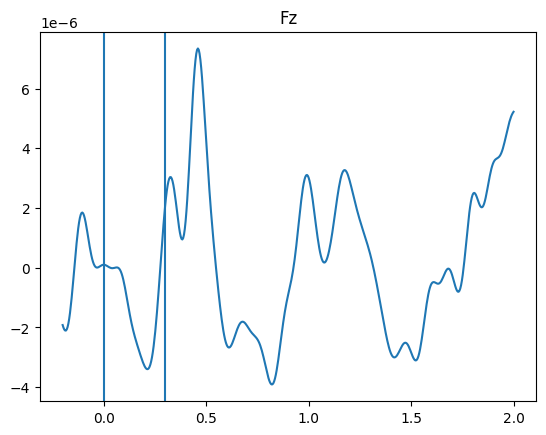

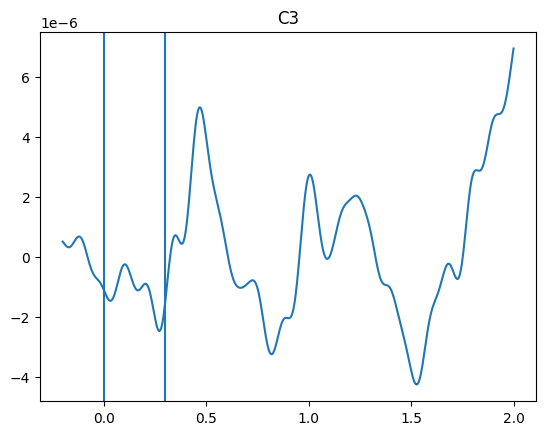

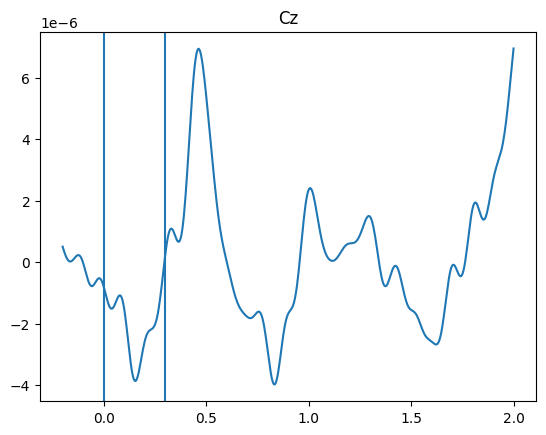

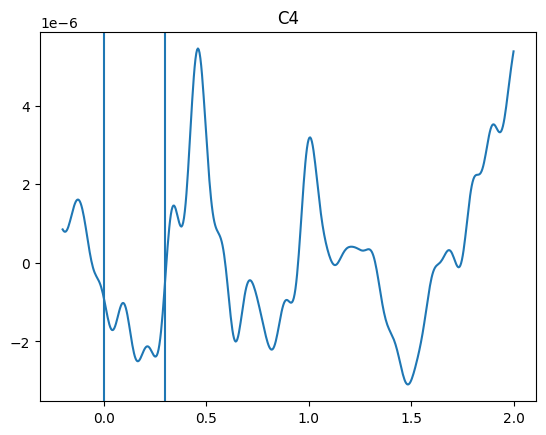

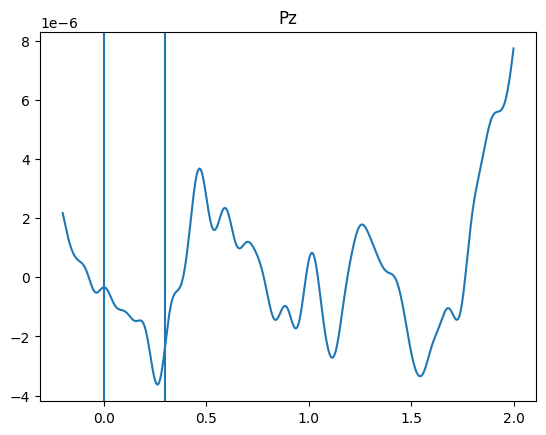

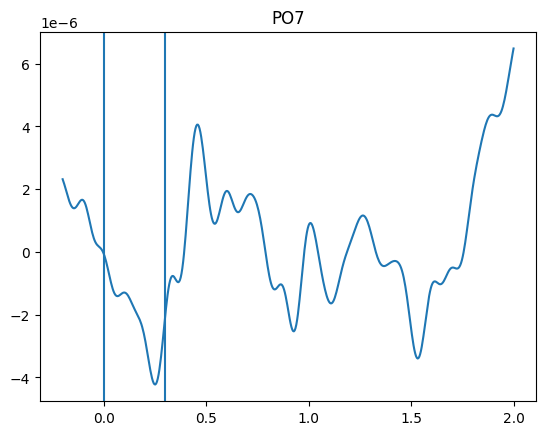

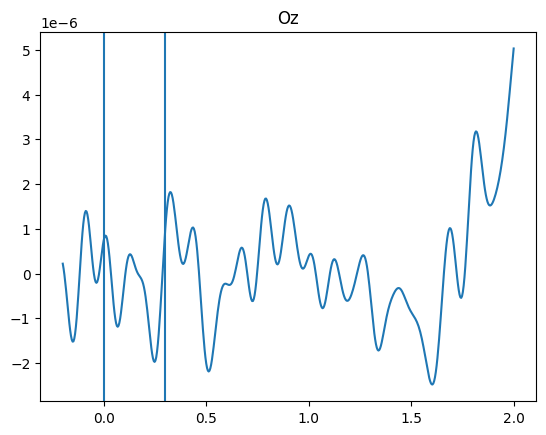

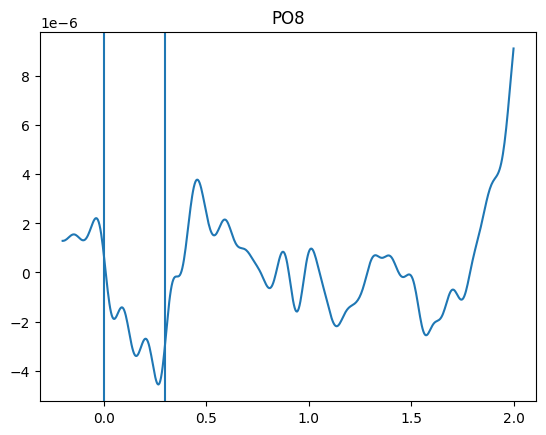

In [69]:
import matplotlib.pyplot as plt
signals = epochs.get_data().mean(axis=0)
signals.shape

for idx, i in enumerate(signals[:-1]):
    plt.plot(np.linspace(-0.2, 2, 551), i)
    plt.title(f"{raw.info.ch_names[idx]}")
    plt.axvline(x=0)
    plt.axvline(x=0.3)
    # plt.ylim(-)
    # plt.xlabel(np.linspace(-0.2, 2, 551))
    plt.show()

Using data from preloaded Raw for 1 events and 551 original time points ...


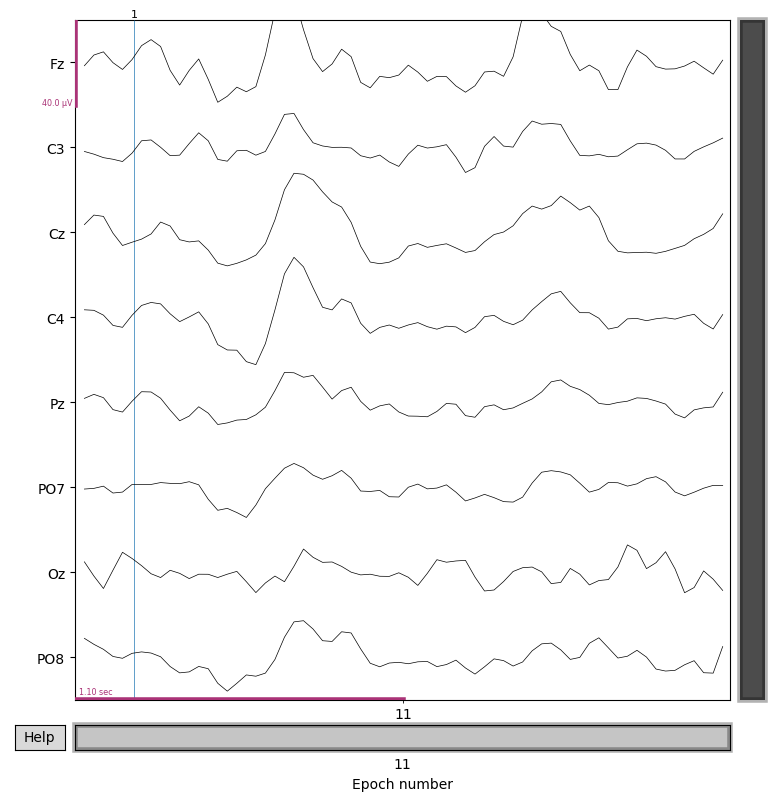

In [52]:
# plotting only events 1 and 2

event_1_2 = mne.pick_events(events, include=[1, 2])

_ = epochs['1'].plot(events=event_1_2)

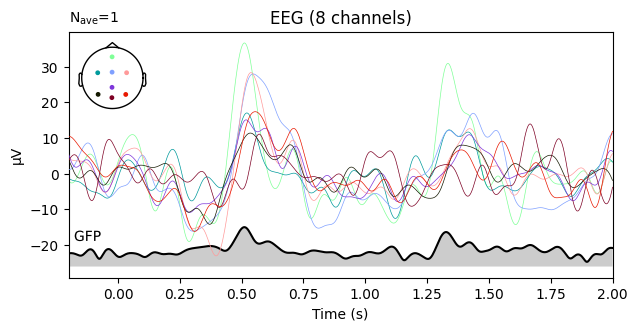

In [53]:
epochs_event1 = epochs['1'].average()
_ = epochs_event1.plot(spatial_colors=True, gfp=True, time_unit='s')


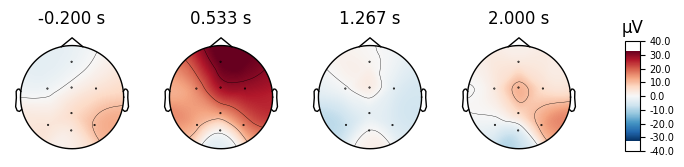

In [55]:
_ = epochs_event1.plot_topomap(ch_type='eeg', colorbar=True)

Using data from preloaded Raw for 1 events and 551 original time points ...
Not setting metadata
1 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


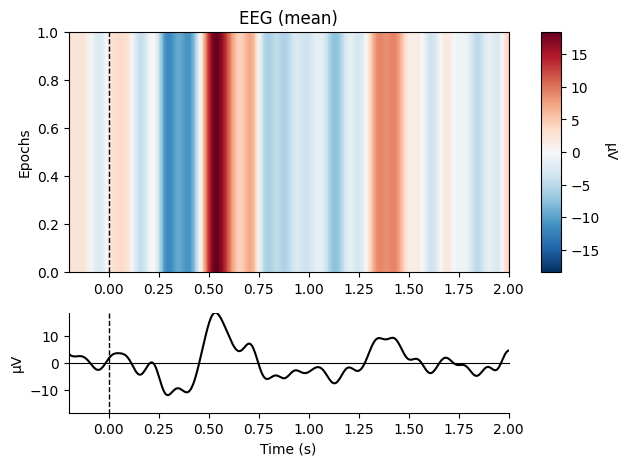

[<Figure size 640x480 with 3 Axes>]

In [56]:
epochs['1'].plot_image(picks='eeg', combine='mean')

In [57]:
events_ssvep = mne.find_events(raw_ssvep)
epochs_ssvep = mne.Epochs(raw=raw_ssvep,events=events, baseline=None, tmin=-0.2, tmax=2.0, reject=None, reject_by_annotation=False)

44 events found
Event IDs: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Not setting metadata
44 matching events found
No baseline correction applied
0 projection items activated


In [58]:
type(epochs_ssvep)

mne.epochs.Epochs

In [63]:
ar = np.linspace(-0.2, 2, 551)
print(len(ar))

551


In [82]:
import matplotlib.pyplot as plt
from  scipy.signal import hilbert
grand_average = mne.grand_average([epochs_ssvep.average()])
signals = grand_average.get_data()
signals.shape

Identifying common channels ...


C:\Users\Sunsun\AppData\Local\Temp\ipykernel_21180\3600984458.py:3: RuntimeWarning: Only a single dataset was passed to mne.grand_average().
  grand_average = mne.grand_average([epochs_ssvep.average()])


(8, 551)

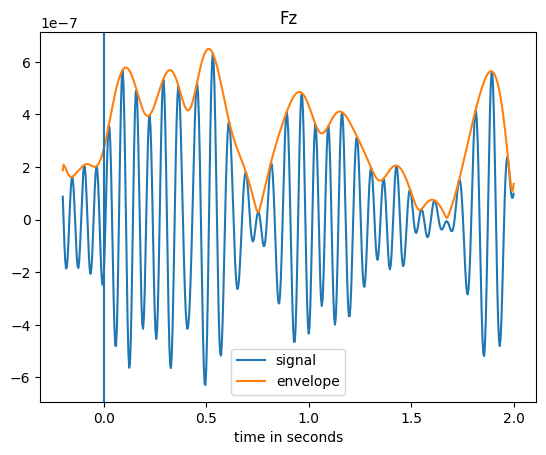

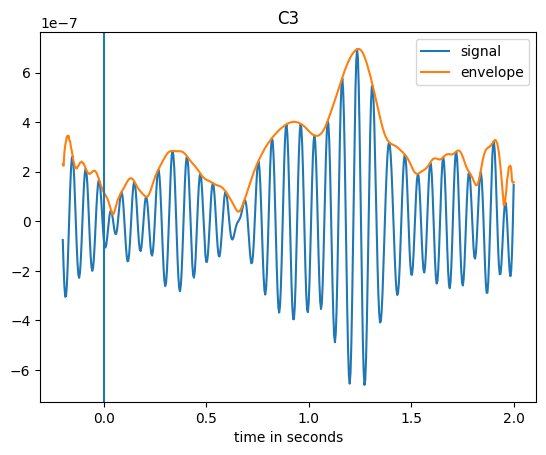

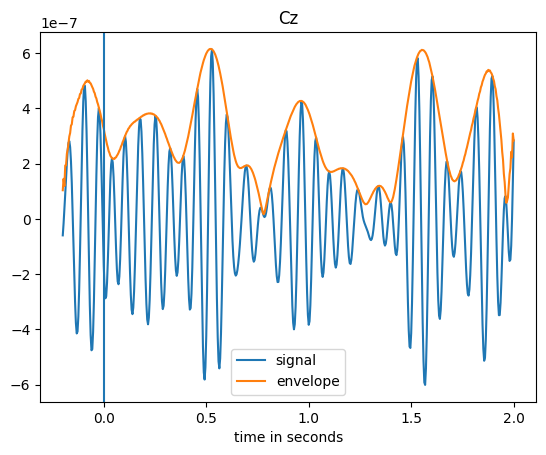

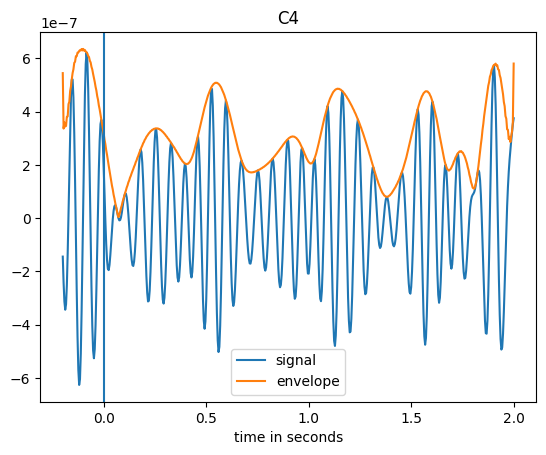

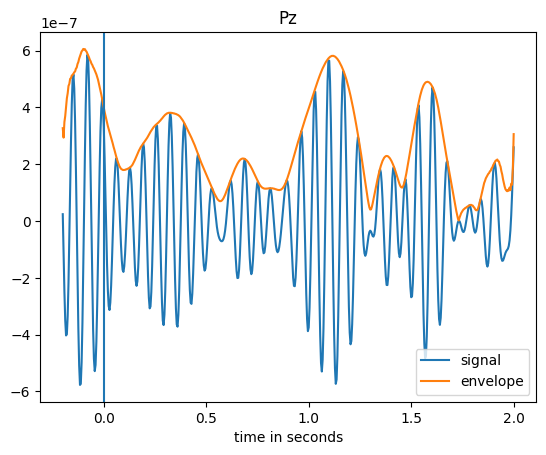

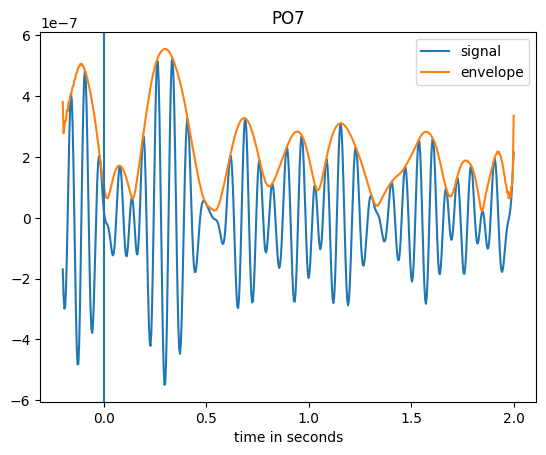

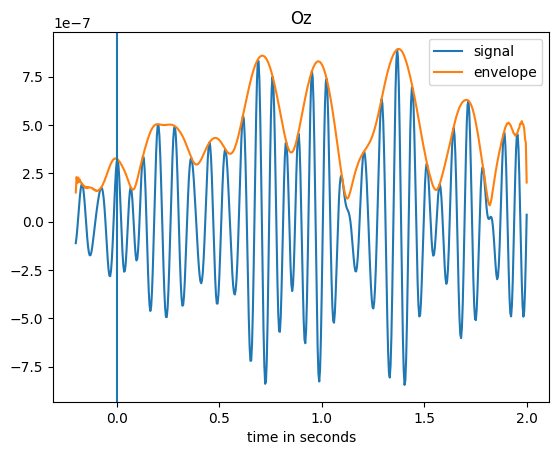

In [83]:
import matplotlib.pyplot as plt
from  scipy.signal import hilbert
signals = epochs_ssvep.average().get_data()
signals.shape
t = np.linspace(-0.2, 2, 551)

for idx, i in enumerate(signals[:-1]):
    j = hilbert(i)
    j_envelope = np.abs(j)
    # print(i.shape)
    fig, ax0 = plt.subplots()
    ax0.plot(t, i, label='signal')
    ax0.plot(t, j_envelope, label='envelope')
    ax0.set_xlabel("time in seconds")
    ax0.legend()
    plt.axvline(x=0)
    plt.title(f"{raw.info.ch_names[idx]}")
    plt.show()

Using data from preloaded Raw for 1 events and 551 original time points ...


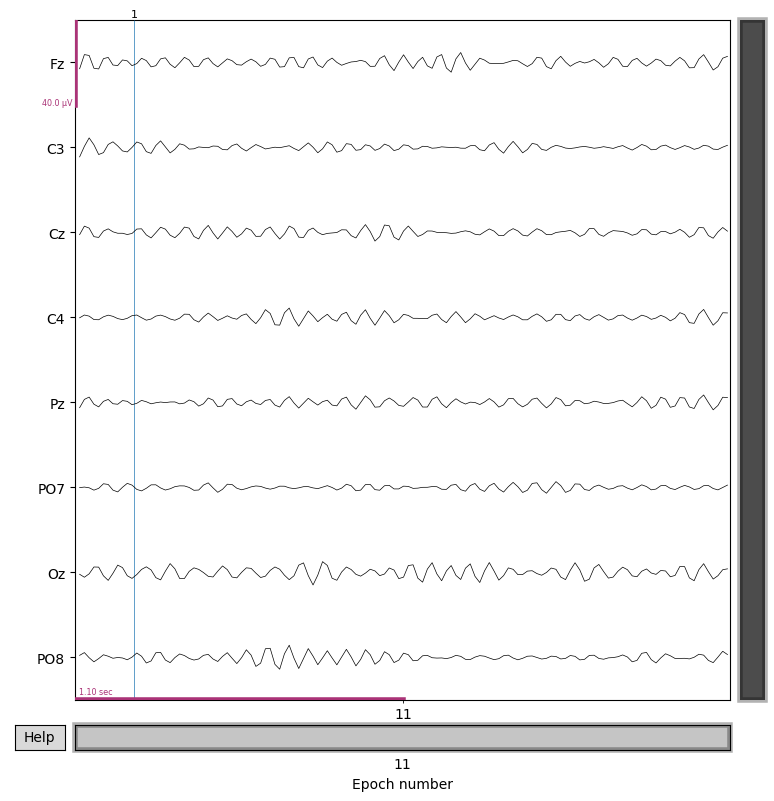

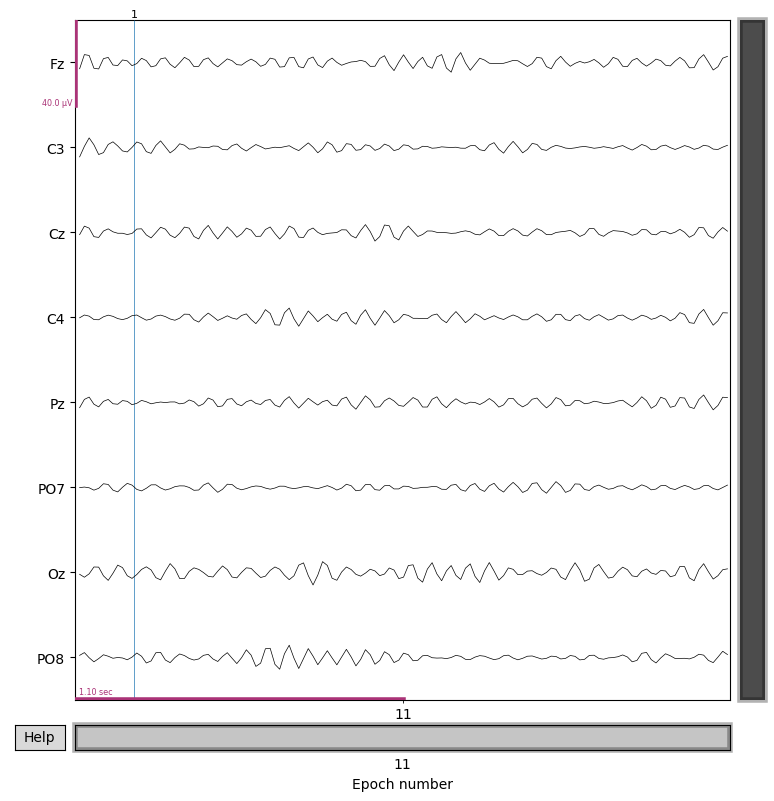

In [22]:
# plotting only events 1 and 2

event_1_2_ssvep = mne.pick_events(events_ssvep, include=[1])

epochs_ssvep['1'].plot(events=event_1_2_ssvep)

In [23]:
epochs.get_data().shape

Using data from preloaded Raw for 44 events and 551 original time points ...


(44, 9, 551)

In [24]:
dropped_epochs = [n for n, dl in enumerate(epochs.drop_log) if len(dl)]  # result is a list
# np.nonzero(map(len, epochs.drop_log)) 
print(dropped_epochs)

[]


### Plotting the average SSVEP at electrode Oz across all subjects for each sub speller. Band pass filter set to [11 Hz , 17 Hz]

In [162]:

event_subgroup1 = np.where((events_ssvep[:,2] > 0) & (events_ssvep[:,2] <= 9))
signal_subgroup1 = epochs_ssvep.get_data()[event_subgroup1[0]][:,6].mean(axis=0)

event_subgroup2 = np.where((events_ssvep[:,2] > 9) & (events_ssvep[:,2] <= 18))
signal_subgroup2 = epochs.get_data()[event_subgroup2[0]][:,6].mean(axis=0)

event_subgroup3 = np.where((events_ssvep[:,2] > 18) & (events_ssvep[:,2] <= 27))
signal_subgroup3 = epochs_ssvep.get_data()[event_subgroup3[0]][:,6].mean(axis=0)

event_subgroup4 = np.where((events_ssvep[:,2] > 27) & (events_ssvep[:,2] <= 33))
signal_subgroup4 = epochs_ssvep.get_data()[event_subgroup4[0]][:,6].mean(axis=0)

event_subgroup5 = np.where((events_ssvep[:,2] > 33) & (events_ssvep[:,2] <= 39))
signal_subgroup5 = epochs_ssvep.get_data()[event_subgroup5[0]][:,6].mean(axis=0)

event_subgroup6 = np.where((events_ssvep[:,2] > 39) & (events_ssvep[:,2] <= 45))
signal_subgroup6 = epochs_ssvep.get_data()[event_subgroup6[0]][:,6].mean(axis=0)

Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...


In [163]:
len(event_subgroup6[0])


6

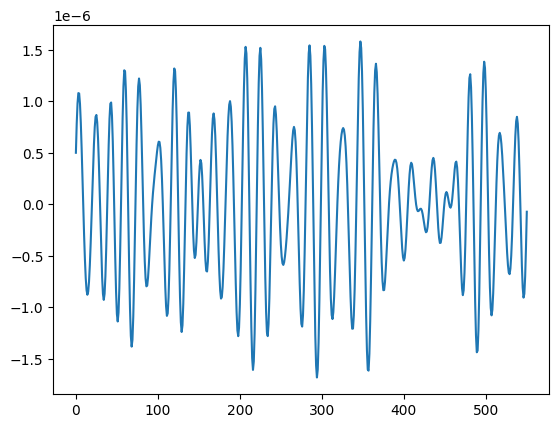

In [165]:
import matplotlib.pyplot as plt
plt.plot(signal_subgroup1)
plt.show()

In [166]:
signals = np.concatenate([signal_subgroup1.reshape(1,-1), signal_subgroup2.reshape(1,-1), signal_subgroup3.reshape(1,-1), signal_subgroup3.reshape(1,-1), signal_subgroup4.reshape(1,-1), signal_subgroup5.reshape(1,-1)], axis=0)
signals.shape

(6, 551)

In [167]:
df = raw.to_data_frame()

In [168]:
corr = df.corr()
corr.shape
corr.select_dtypes(['number']).columns

Index(['time', 'Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8',
       'STIM MARKERS'],
      dtype='object')

In [169]:
signals.shape[1]

551

In [170]:
import  pandas as pd

df = pd.DataFrame(signals)

In [171]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,541,542,543,544,545,546,547,548,549,550
0,4.984627e-07,7.804509e-07,9.784891e-07,1.077678e-06,1.073728e-06,9.726215e-07,7.891722e-07,5.447549e-07,2.645992e-07,-2.496941e-08,...,3.433736e-07,2.509530e-08,-3.046796e-07,-5.981082e-07,-8.104679e-07,-9.073302e-07,-8.704821e-07,-7.015549e-07,-4.226502e-07,-7.372496e-08
1,5.921910e-07,4.304080e-07,2.129408e-07,-4.860889e-08,-3.402801e-07,-6.464518e-07,-9.506474e-07,-1.236408e-06,-1.488193e-06,-1.692259e-06,...,-1.590862e-07,-8.403286e-08,-5.317174e-09,8.027067e-08,1.760006e-07,2.850668e-07,4.104073e-07,5.544754e-07,7.189747e-07,9.045849e-07
2,-1.232024e-06,-1.198892e-06,-9.943932e-07,-6.503522e-07,-2.178333e-07,2.405819e-07,6.599967e-07,9.825255e-07,1.165393e-06,1.186654e-06,...,5.300610e-07,4.430835e-07,3.095876e-07,1.479463e-07,-2.186786e-08,-1.804964e-07,-3.110615e-07,-4.005625e-07,-4.407625e-07,-4.285916e-07
3,-1.232024e-06,-1.198892e-06,-9.943932e-07,-6.503522e-07,-2.178333e-07,2.405819e-07,6.599967e-07,9.825255e-07,1.165393e-06,1.186654e-06,...,5.300610e-07,4.430835e-07,3.095876e-07,1.479463e-07,-2.186786e-08,-1.804964e-07,-3.110615e-07,-4.005625e-07,-4.407625e-07,-4.285916e-07
4,4.520699e-07,1.557184e-07,-1.770108e-07,-4.907220e-07,-7.329486e-07,-8.617056e-07,-8.514598e-07,-6.967631e-07,-4.131300e-07,-3.510306e-08,...,-1.632628e-06,-1.814995e-06,-1.808704e-06,-1.587867e-06,-1.152222e-06,-5.303464e-07,2.210801e-07,1.022203e-06,1.778727e-06,2.393473e-06


<Figure size 1900x50000 with 0 Axes>

<Figure size 1900x50000 with 0 Axes>

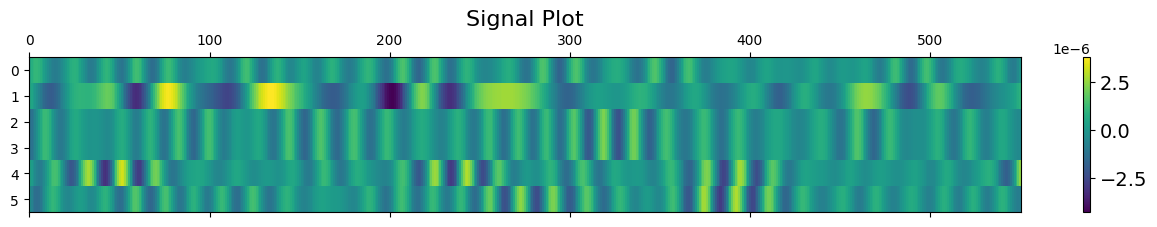

In [173]:
import matplotlib.pyplot as plt

# signals[6] should be location of Oz

f = plt.figure(figsize=(19, 500))
plt.matshow(signals, aspect = 'auto')
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Signal Plot', fontsize=16)
plt.show()

### ERP variations of different sub-spellers , band pass filter 1Hz - 10Hz 

In [180]:
event_subgroup1_erp = np.where((events[:,2] > 0) & (events[:,2] <= 9))
signal_subgroup1_erp = epochs.get_data()[event_subgroup1_erp[0]].mean(axis=0)

event_subgroup2_erp = np.where((events[:,2] > 9) & (events[:,2] <= 18))
signal_subgroup2_erp = epochs.get_data()[event_subgroup2_erp[0]].mean(axis=0)

event_subgroup3_erp = np.where((events[:,2] > 18) & (events[:,2] <= 27))
signal_subgroup3_erp = epochs.get_data()[event_subgroup3_erp[0]].mean(axis=0)

event_subgroup4_erp = np.where((events[:,2] > 27) & (events[:,2] <= 33))
signal_subgroup4_erp = epochs_ssvep.get_data()[event_subgroup4_erp[0]].mean(axis=0)

event_subgroup5_erp = np.where((events[:,2] > 33) & (events[:,2] <= 39))
signal_subgroup5_erp = epochs.get_data()[event_subgroup5_erp[0]].mean(axis=0)

event_subgroup6_erp = np.where((events[:,2] > 39) & (events[:,2] <= 45))
signal_subgroup6_erp = epochs.get_data()[event_subgroup6_erp[0]].mean(axis=0)

Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...
Using data from preloaded Raw for 44 events and 551 original time points ...


In [182]:
signals.shape

(6, 551)

In [183]:
signal_subgroup1_erp.shape

(9, 551)

In [185]:
signal_subgroup1_erp.reshape(1,-1).shape

(1, 4959)

In [188]:
signal_subgroup1.shape

(551,)

In [187]:
signal_subgroup1.reshape(1,-1).shape

(1, 551)

In [216]:
signals_erp = np.dstack((signal_subgroup1_erp, signal_subgroup2_erp, signal_subgroup3_erp, signal_subgroup3_erp, signal_subgroup4_erp, signal_subgroup5_erp))
signals_erp = np.swapaxes(signals_erp, 2, 1)
signals_erp.shape

(9, 6, 551)

In [217]:
signals_erp[0].shape

(6, 551)

<Figure size 1900x50000 with 0 Axes>

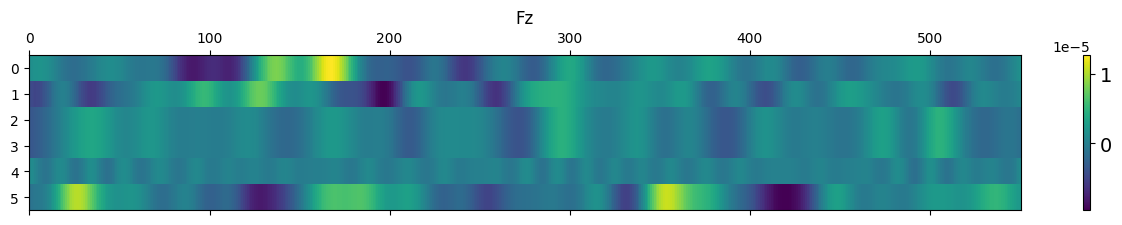

<Figure size 1900x50000 with 0 Axes>

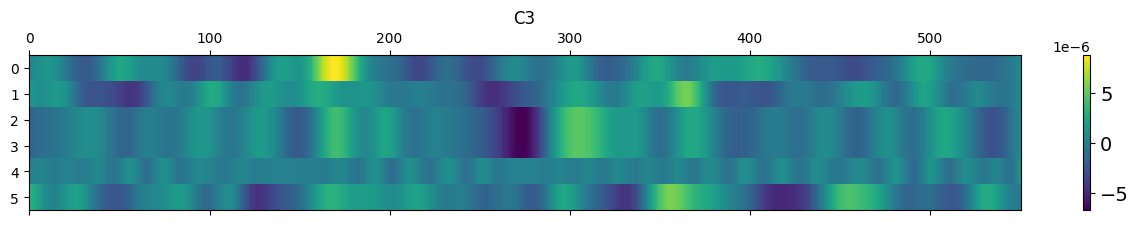

<Figure size 1900x50000 with 0 Axes>

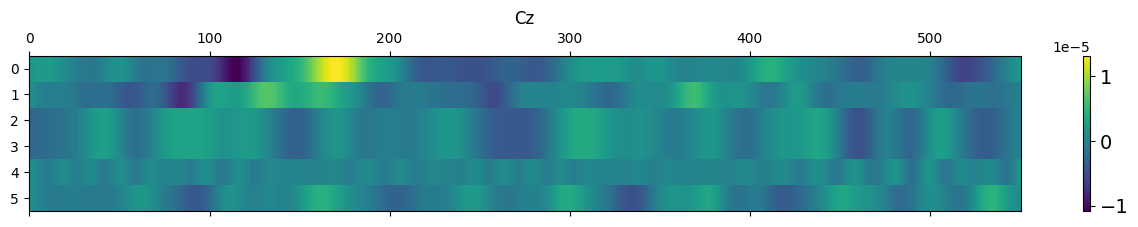

<Figure size 1900x50000 with 0 Axes>

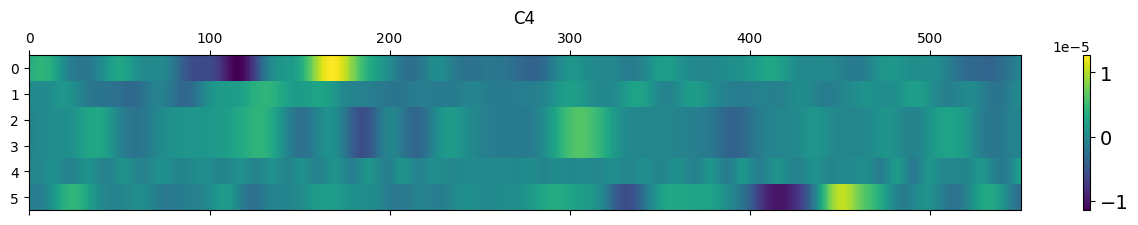

<Figure size 1900x50000 with 0 Axes>

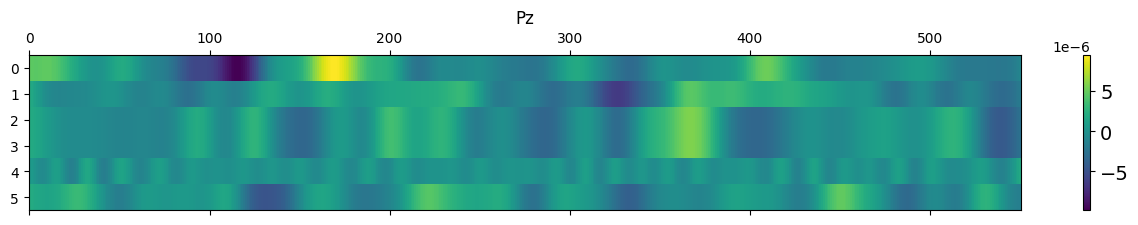

<Figure size 1900x50000 with 0 Axes>

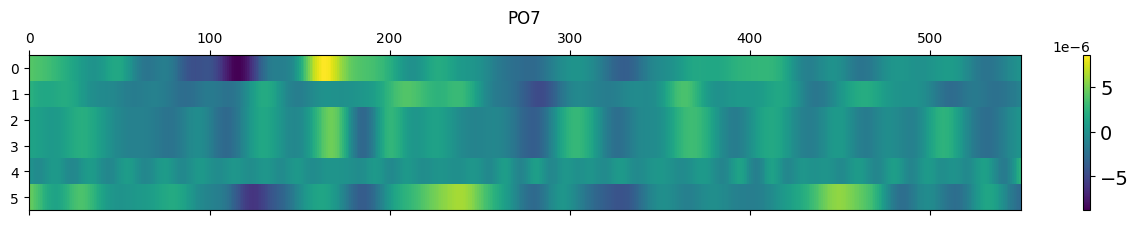

<Figure size 1900x50000 with 0 Axes>

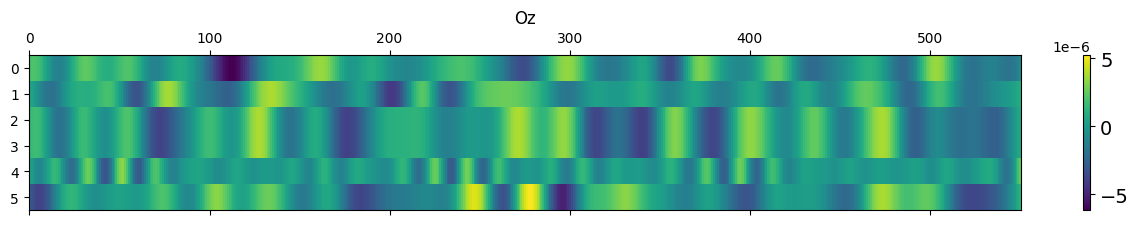

<Figure size 1900x50000 with 0 Axes>

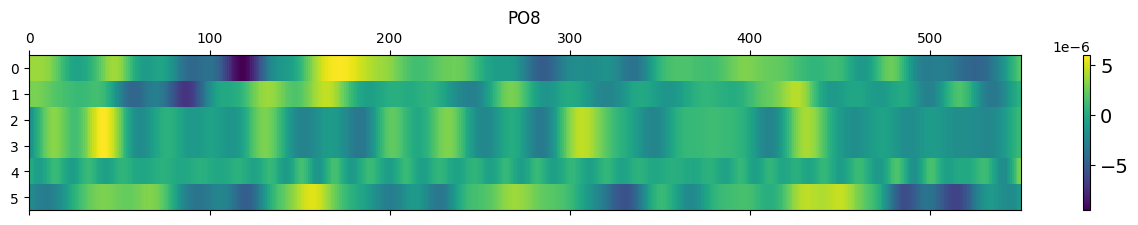

In [219]:
import matplotlib.pyplot as plt
from  scipy.signal import hilbert

for idx, i in enumerate(signals_erp[:-1]):
    f = plt.figure(figsize=(19, 500))
    plt.matshow(i, aspect = 'auto')
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title(f"{raw.info.ch_names[idx]}")
    plt.show()

In [97]:
import pandas as pd
import numpy as np

df = raw.to_data_frame()
print(len(df.loc[df['STIM MARKERS'] == 0.0]))

28844


In [98]:
df.head()

,time,Fz,C3,Cz,C4,Pz,PO7,Oz,PO8,STIM MARKERS
0,0.000,158659.845591,157305.136323,179854.750633,162897.646427,139715.120196,157746.806741,681791.841984,167736.172676,0.0
1,0.004,158043.235540,156399.026513,179011.896253,162080.809474,138649.255037,156644.359231,681121.706963,166527.613997,0.0
2,0.008,157313.227654,155070.796609,177717.000246,160848.245025,136985.227466,155084.729195,680043.339729,164671.868086,0.0
3,0.012,157377.570868,155172.213912,177798.062563,160922.393203,137088.119984,155212.223530,680113.673210,164807.140827,0.0
4,0.016,158174.648881,156552.270055,179124.474525,162189.140916,138779.580593,156844.034791,681213.736534,166713.505983,0.0
